In [ ]:
# STEP 1: Install all the required libraries
# ------------------------------------------
# - textblob : for sentiment analysis
# - wordcloud : for generating word clouds
# - vaderSentiment : alternative sentiment analyzer (optional)
# - nltk : for text preprocessing (stopwords)


!pip install -q textblob wordcloud vaderSentiment nltk

# Download TextBlob corpora & NLTK resources
!python -m textblob.download_corpora >/dev/null 2>&1

import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# STEP 2: Upload the CSV file into Colab
# --------------------------------------
# This will open a file chooser in Colab.
# Select your 'student_feedback.csv' from your computer.

from google.colab import files
import io, pandas as pd

# Upload the CSV file
uploaded = files.upload()   # Choose "student_feedback.csv"
filename = list(uploaded.keys())[0]




Saving student_feedback.csv to student_feedback.csv


In [ ]:
# Ensure at least one file was uploaded

filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]))
print("Data loaded! Shape =", df.shape)
df.head()


Data loaded! Shape = (1001, 10)


,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


In [ ]:
# Clean and standardize column names
df.columns = df.columns.str.strip().str.replace("\n"," ").str.replace("  "," ")
print(df.columns.tolist())



['unnamed:_0', 'student_id', 'well_versed_with_the_subject', 'explains_concepts_in_an_understandable_way', 'use_of_presentations', 'degree_of_difficulty_of_assignments', 'solves_doubts_willingly', 'structuring_of_the_course', 'provides_support_for_students_going_above_and_beyond', 'course_recommendation_based_on_relevance']


In [ ]:
# Drop first column (Student ID) safely
df_no_id = df.drop(columns=[df.columns[0]])

# Summary statistics
df_no_id.describe()




,student_id,well_versed_with_the_subject,explains_concepts_in_an_understandable_way,use_of_presentations,degree_of_difficulty_of_assignments,solves_doubts_willingly,structuring_of_the_course,provides_support_for_students_going_above_and_beyond,course_recommendation_based_on_relevance
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,500.000000,7.497502,6.081918,5.942058,5.430569,5.474525,5.636364,5.662338,5.598402
std,289.108111,1.692998,2.597168,1.415853,2.869046,2.874648,2.920212,2.891690,2.886617
min,0.000000,5.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,250.000000,6.000000,4.000000,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,500.000000,8.000000,6.000000,6.000000,5.000000,6.000000,6.000000,6.000000,6.000000
75%,750.000000,9.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,1000.000000,10.000000,10.000000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000


Average scores per question:
student_id                                              500.000000
well_versed_with_the_subject                              7.497502
explains_concepts_in_an_understandable_way                6.081918
use_of_presentations                                      5.942058
provides_support_for_students_going_above_and_beyond      5.662338
structuring_of_the_course                                 5.636364
course_recommendation_based_on_relevance                  5.598402
solves_doubts_willingly                                   5.474525
degree_of_difficulty_of_assignments                       5.430569
dtype: float64


/tmp/ipython-input-1203864837.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_scores.values, y=avg_scores.index, palette="viridis")


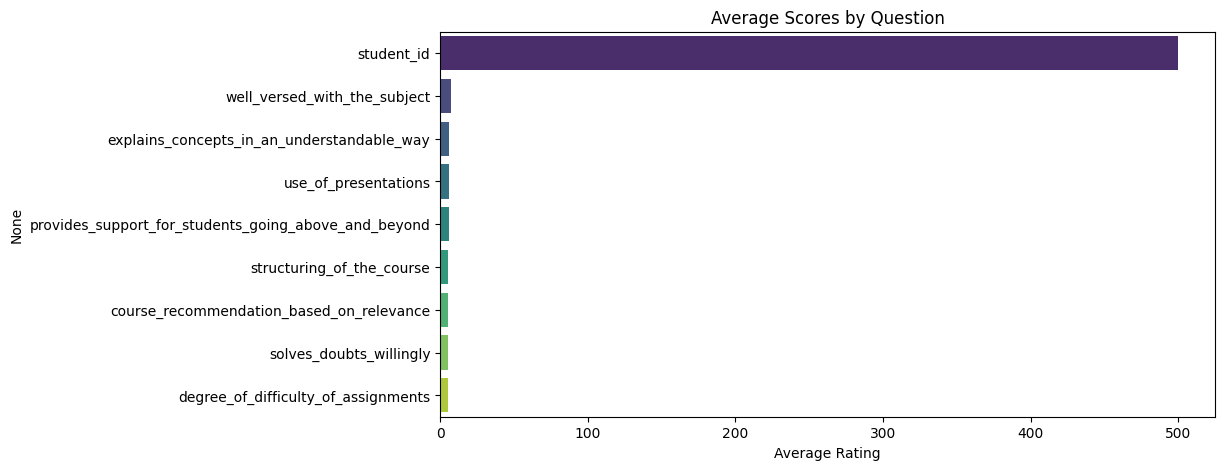

In [ ]:
# Average rating per question
avg_scores = df_no_id.mean().sort_values(ascending=False)
print("Average scores per question:")
print(avg_scores)
import matplotlib.pyplot as plt
import seaborn as sns
# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=avg_scores.values, y=avg_scores.index, palette="viridis")
plt.title("Average Scores by Question")
plt.xlabel("Average Rating")
plt.show()


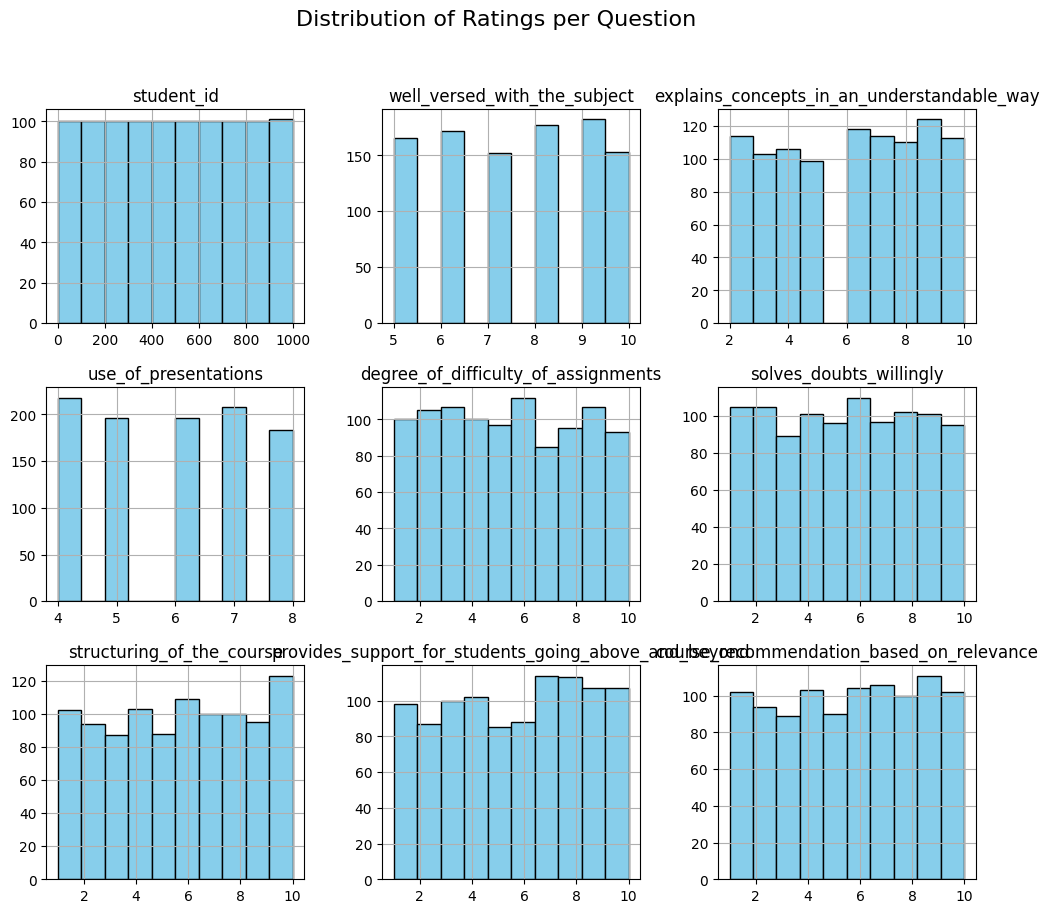

In [ ]:
# Distribution plots for each question
df_no_id.hist(figsize=(12,10), bins=10, color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Ratings per Question", fontsize=16)
plt.show()


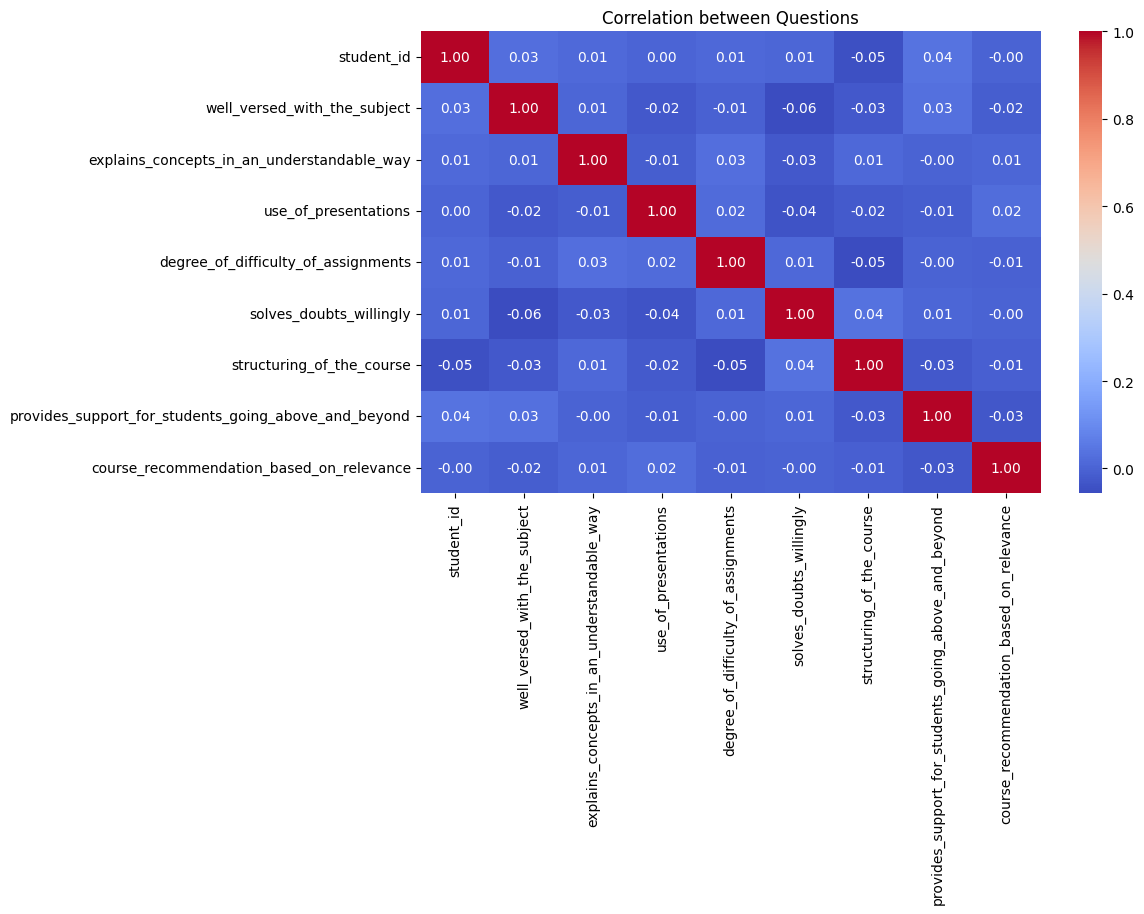

In [30]:
# Correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(df_no_id.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Questions")
plt.show()


In [ ]:
print("Strongest area (highest avg):", avg_scores.idxmax(), "=", round(avg_scores.max(), 2))
print("Weakest area (lowest avg):", avg_scores.idxmin(), "=", round(avg_scores.min(), 2))




Strongest area (highest avg): student_id = 500.0
Weakest area (lowest avg): degree_of_difficulty_of_assignments = 5.43


In [ ]:
df_no_id.to_csv("processed_student_feedback.csv", index=False)
from google.colab import files
files.download("processed_student_feedback.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
# Example: compute average score per question across all students
question_cols = [c for c in df.columns if c not in ['mean_rating']]  # adjust this to your actual column names
avg_per_question = df[question_cols].mean()  # gives you a Series: question -> average rating
print(df.columns)

df['mean_rating'] = df[question_cols].mean(axis=1)

import pandas as pd

print("⯑ Insights from Student Feedback:\n")

# 1. Strengths (High-rated areas)
print("1. Strengths (High-rated areas):")
high_scores = avg_per_question[avg_per_question >= avg_per_question.mean()]
for q, score in high_scores.items():
    print(f" - {q}: {round(score, 2)}")

# 2. Areas for Improvement
print("\n2. Areas for Improvement (Lower-rated areas):")
low_scores = avg_per_question[avg_per_question < avg_per_question.mean()]
for q, score in low_scores.items():
    print(f" - {q}: {round(score, 2)}")

# 3. Overall Satisfaction
print("\n3. Overall Satisfaction:")
print(f" - Average mean rating across all students: {round(df['mean_rating'].mean(), 2)}")

# Recommendations
print("\nRecommendations:")
print("- Maintain strong subject expertise and relevance of course content.")
print("- Revisit assignment structure and difficulty to ensure clarity.")
print("- Improve course structuring for better learning flow.")
print("- Continue supporting students beyond standard expectations.")





Index(['unnamed:_0', 'student_id', 'well_versed_with_the_subject',
       'explains_concepts_in_an_understandable_way', 'use_of_presentations',
       'degree_of_difficulty_of_assignments', 'solves_doubts_willingly',
       'structuring_of_the_course',
       'provides_support_for_students_going_above_and_beyond',
       'course_recommendation_based_on_relevance'],
      dtype='object')
⯑ Insights from Student Feedback:

1. Strengths (High-rated areas):
 - unnamed:_0: 500.0
 - student_id: 500.0

2. Areas for Improvement (Lower-rated areas):
 - well_versed_with_the_subject: 7.5
 - explains_concepts_in_an_understandable_way: 6.08
 - use_of_presentations: 5.94
 - degree_of_difficulty_of_assignments: 5.43
 - solves_doubts_willingly: 5.47
 - structuring_of_the_course: 5.64
 - provides_support_for_students_going_above_and_beyond: 5.66
 - course_recommendation_based_on_relevance: 5.6

3. Overall Satisfaction:
 - Average mean rating across all students: 104.73

Recommendations:
- Maintain stro